In [1]:
import numpy as np, matplotlib.pyplot as plt
import pcmdpy as ppy
from tqdm import tqdm
%matplotlib inline

In [2]:
f = ppy.instrument.default_ngc3377_filters()
iso_model_rot = ppy.isochrones.Isochrone_Model(f, rotating=True)
iso_model_nr = ppy.isochrones.Isochrone_Model(f, rotating=False)


In [84]:
results = {}
results['kroupa'] = ppy.results.ResultsPlotter('results/kroupa_m1.csv', live_file='results/kroupa_m1_live.csv')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10d6d3eb8>,
      dtype=object)

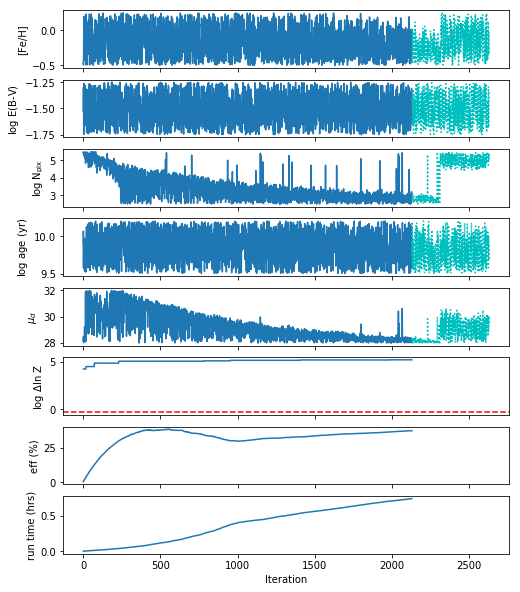

In [87]:
results['kroupa'].plot_chains(show_prior=False)

In [9]:
driv_nr = ppy.driver.Driver(iso_model_nr, gpu=False)
driv_rot = ppy.driver.Driver(iso_model_rot, gpu=False)

In [10]:
g = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.SingleFeH(),
    ppy.dustmodels.SingleDust(),
    ppy.sfhmodels.SSPModel(),
    ppy.distancemodels.VariableDistance()
)
g_kroupa = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.SingleFeH(),
    ppy.dustmodels.SingleDust(),
    ppy.sfhmodels.SSPModel(),
    ppy.distancemodels.VariableDistance(),
    imf='kroupa'
)
g_bh = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.SingleFeH(),
    ppy.dustmodels.SingleDust(),
    ppy.sfhmodels.SSPModel(),
    ppy.distancemodels.VariableDistance(),
    imf='kroupa',
    imf_kwargs={'alpha_lower': -3.3}
)
g.set_params(np.array([0.0, -1.75, 4.0, 9.8, 30.0]))

In [48]:
d_med = {}
d_std = {}
for a in tqdm(np.arange(9.0, 10.25, 0.05)):
    g.set_params(np.array([0.0, -1.75, 5.0, a, 30.0]))
    pcmd_nr, _ = driv_nr.simulate(g, 256)
    pcmd_rot, _ = driv_rot.simulate(g, 256)
    d_med[a] = (np.median(pcmd_rot[0]) - np.median(pcmd_nr[0]))/np.median(pcmd_nr[0])
    d_std[a] = (np.std(pcmd_rot[0]) - np.std(pcmd_nr[0]))/np.std(pcmd_nr[0])

100%|██████████| 25/25 [01:18<00:00,  3.12s/it]


In [49]:
d_med

{9.0: -0.00040485917,
 9.05: -0.0012596162,
 9.100000000000001: -0.0013613335,
 9.150000000000002: -0.00035276695,
 9.200000000000003: -0.0001632585,
 9.250000000000004: -0.00035447095,
 9.300000000000004: -0.0009797851,
 9.350000000000005: -0.00083938433,
 9.400000000000006: -0.0018029318,
 9.450000000000006: -0.00077637687,
 9.500000000000007: -0.0009622435,
 9.550000000000008: -0.00053290254,
 9.600000000000009: 2.9320136e-05,
 9.65000000000001: 0.00014212761,
 9.70000000000001: -7.616711e-05,
 9.75000000000001: -5.4970697e-05,
 9.800000000000011: 1.9646071e-05,
 9.850000000000012: -7.34021e-05,
 9.900000000000013: -5.7774338e-05,
 9.950000000000014: -1.2325672e-05,
 10.000000000000014: 0.00010689843,
 10.050000000000015: 4.2692758e-05,
 10.100000000000016: -6.1684805e-05,
 10.150000000000016: 6.48258e-05,
 10.200000000000017: -1.711697e-05}

In [50]:
d_std

{9.0: -0.060233865,
 9.05: 0.041967735,
 9.100000000000001: 0.018632278,
 9.150000000000002: 0.014051064,
 9.200000000000003: 0.012143341,
 9.250000000000004: 0.0138347,
 9.300000000000004: -0.02714546,
 9.350000000000005: -0.014193889,
 9.400000000000006: -0.012381231,
 9.450000000000006: 0.0044984887,
 9.500000000000007: -0.0023286778,
 9.550000000000008: 0.0014106606,
 9.600000000000009: 0.010034184,
 9.65000000000001: 0.0073827915,
 9.70000000000001: 0.010524371,
 9.75000000000001: 0.0047719963,
 9.800000000000011: 0.002518417,
 9.850000000000012: 0.002235607,
 9.900000000000013: -0.0015971925,
 9.950000000000014: -0.007627274,
 10.000000000000014: -0.004548452,
 10.050000000000015: 0.0035098994,
 10.100000000000016: 0.0032386137,
 10.150000000000016: -0.002546262,
 10.200000000000017: -0.013081808}

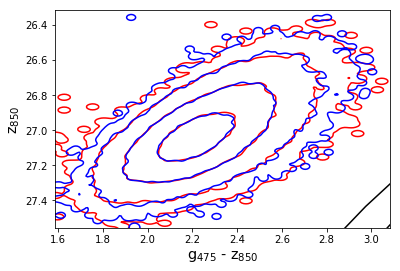

In [37]:
fig, ax = plt.subplots()
ppy.plotting.plot_pcmd_contours(pcmd_nr, ax=ax, color='r')
ppy.plotting.plot_pcmd_contours(pcmd_rot, ax=ax, color='b')
ppy.plotting.plot_isochrone(iso_model_rot, axes=ax)

In [42]:
d_sig_npix = {}
for Np in tqdm(np.arange(2.0, 6.0, 0.25)):
    g.set_params(np.array([0.0, -1.5, Np, 10.0, 30.0]))
    pcmd_1, _ = driv_rot.simulate(g, 256)
    g.set_params(np.array([0.0, -1.5, Np+0.2, 10.0, 30.0]))
    pcmd_2, _ = driv_rot.simulate(g, 256)
    d_sig_npix[Np] = (np.std(pcmd_1[0]) - np.std(pcmd_2[0]))/np.std(pcmd_1[0])

100%|██████████| 16/16 [00:46<00:00,  2.88s/it]


In [43]:
d_sig_npix

{2.0: 0.4072111,
 2.25: 0.47062773,
 2.5: 0.24342628,
 2.75: 0.19375423,
 3.0: 0.1879742,
 3.25: 0.19467805,
 3.5: 0.17854156,
 3.75: 0.18997937,
 4.0: 0.20284358,
 4.25: 0.19592524,
 4.5: 0.20310713,
 4.75: 0.20172672,
 5.0: 0.20327201,
 5.25: 0.21562876,
 5.5: 0.20524171,
 5.75: 0.19799595}

In [51]:
g.set_params(np.array([0.0, -1.75, 5.0, 10.0, 30.0]))
pcmd_1, _ = driv_rot.simulate(g, 256, downsample=5)
pcmd_2, _ = driv_rot.simulate(g, 256, downsample=1)

In [52]:
np.std(pcmd_1, axis=-1)

array([0.04151247, 0.04669   ], dtype=float32)

In [53]:
np.std(pcmd_2, axis=-1)

array([0.04178698, 0.04718547], dtype=float32)

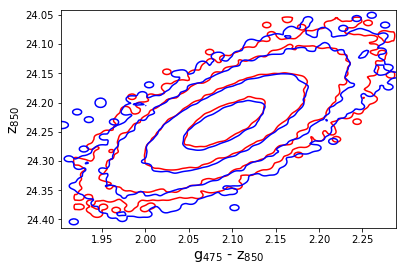

In [54]:
fig, ax = plt.subplots()
ppy.plotting.plot_pcmd_contours(pcmd_1, ax=ax, color='r')
ppy.plotting.plot_pcmd_contours(pcmd_2, ax=ax, color='b')
ppy.plotting.plot_isochrone(iso_model_rot, axes=ax)

In [59]:
g.set_params(np.array([0.0, -1.75, 5.0, 10.0, 30.0]))
pcmd_1, _ = driv_rot.simulate(g, 256)
pcmd_2, _ = driv_rot.simulate(g, 256, dither=False)

In [60]:
np.std(pcmd_1, axis=-1)

array([0.04165072, 0.04681563], dtype=float32)

In [61]:
np.std(pcmd_2, axis=-1)

array([0.04463986, 0.04886848], dtype=float32)

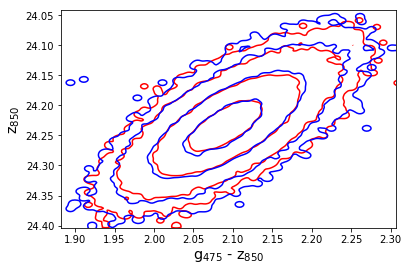

In [62]:
fig, ax = plt.subplots()
ppy.plotting.plot_pcmd_contours(pcmd_1, ax=ax, color='r')
ppy.plotting.plot_pcmd_contours(pcmd_2, ax=ax, color='b')
ppy.plotting.plot_isochrone(iso_model_rot, axes=ax)

In [14]:
m = np.logspace(-1, np.log10(300), 1000)
imf_1 = g.imf_func(m, lower=0.1)
imf_2 = g_kroupa.imf_func(m, lower=0.1)
imf_3 = g_bh.imf_func(m, lower=0.1, **g_bh.imf_kwargs)


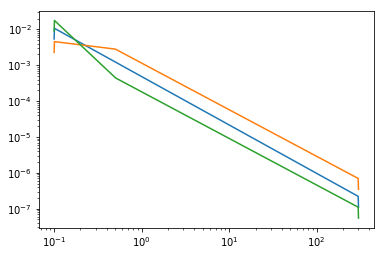

In [16]:
plt.plot(m, imf_1)
plt.plot(m, imf_2)
plt.plot(m, imf_3)
plt.xscale('log')
plt.yscale('log')

In [17]:
g.set_params(np.array([0.0, -1.75, 5.0, 10.0, 30.0]))
pcmd_1, _ = driv_rot.simulate(g, 256)

In [18]:
g_kroupa.set_params(np.array([0.0, -1.75, 5.0-0.37, 10.0, 30.0]))
pcmd_2, _ = driv_rot.simulate(g_kroupa, 256, dither=False)

In [45]:
g_bh.set_params(np.array([0.0, -1.75, 5.0+0.42, 10.0, 30.0]))
pcmd_3, _ = driv_rot.simulate(g_bh, 256, dither=False)

In [46]:
iso_model_nr.get_stellar_mass(g)

21516.647442780333

In [47]:
iso_model_nr.get_stellar_mass(g_kroupa)

12185.636479359704

In [48]:
iso_model_nr.get_stellar_mass(g_bh)

44619.204490167074

In [49]:
np.std(pcmd_1[0]), np.std(pcmd_2[0]), np.std(pcmd_3[0])

(0.041863002, 0.046882205, 0.043175187)

(1.8, 2.4)

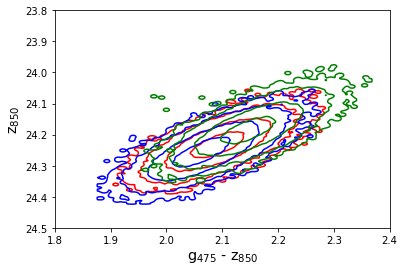

In [50]:
fig, ax = plt.subplots()
ppy.plotting.plot_pcmd_contours(pcmd_1, ax=ax, color='r')
ppy.plotting.plot_pcmd_contours(pcmd_2, ax=ax, color='b')
ppy.plotting.plot_pcmd_contours(pcmd_3, ax=ax, color='g')
ppy.plotting.plot_isochrone(iso_model_rot, axes=ax)
ax.set_ylim([24.5, 23.8])
ax.set_xlim([1.8, 2.4])

In [51]:
sky = [126.9, 76.5]

In [75]:
g_kroupa.set_params(np.array([0.0, -1.8, 5.0, 9.8, 30.0]))
pcmd_kroupa, _ = driv_nr.simulate(g_kroupa, 256, sky_noise=sky)

In [52]:
g_bh.set_params(np.array([0.0, -1.8, 5.0, 9.8, 30.0]))
pcmd_bh, _ = driv_nr.simulate(g_bh, 256, sky_noise=sky)

In [76]:
np.savetxt('../data/kroupa/kroupa_1.pcmd', pcmd_kroupa.T, fmt='%.9f')

In [53]:
np.savetxt('../data/kroupa/bh_1.pcmd', pcmd_bh.T, fmt='%.9f')

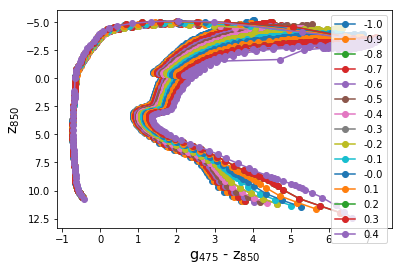

In [76]:
fig, ax = plt.subplots()
for feh in np.arange(-1., 0.5, 0.1):
    mags, _, _ = iso_model_nr.get_isochrone(10.0, feh)
    ax.plot(mags[1]-mags[0], mags[0], ls='-', marker='o', label=f'{feh:.1f}')
ppy.plotting.plot_isochrone(iso_model_nr, axes=ax, alpha=0., dmod=0.)
ax.legend(loc=0)

In [66]:
mags.shape

(2, 295)